In [ ]:
import os


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [ ]:
df=pd.DataFrame(pd.read_csv('/content/advertising.csv'))
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.shape


(200, 4)

In [ ]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

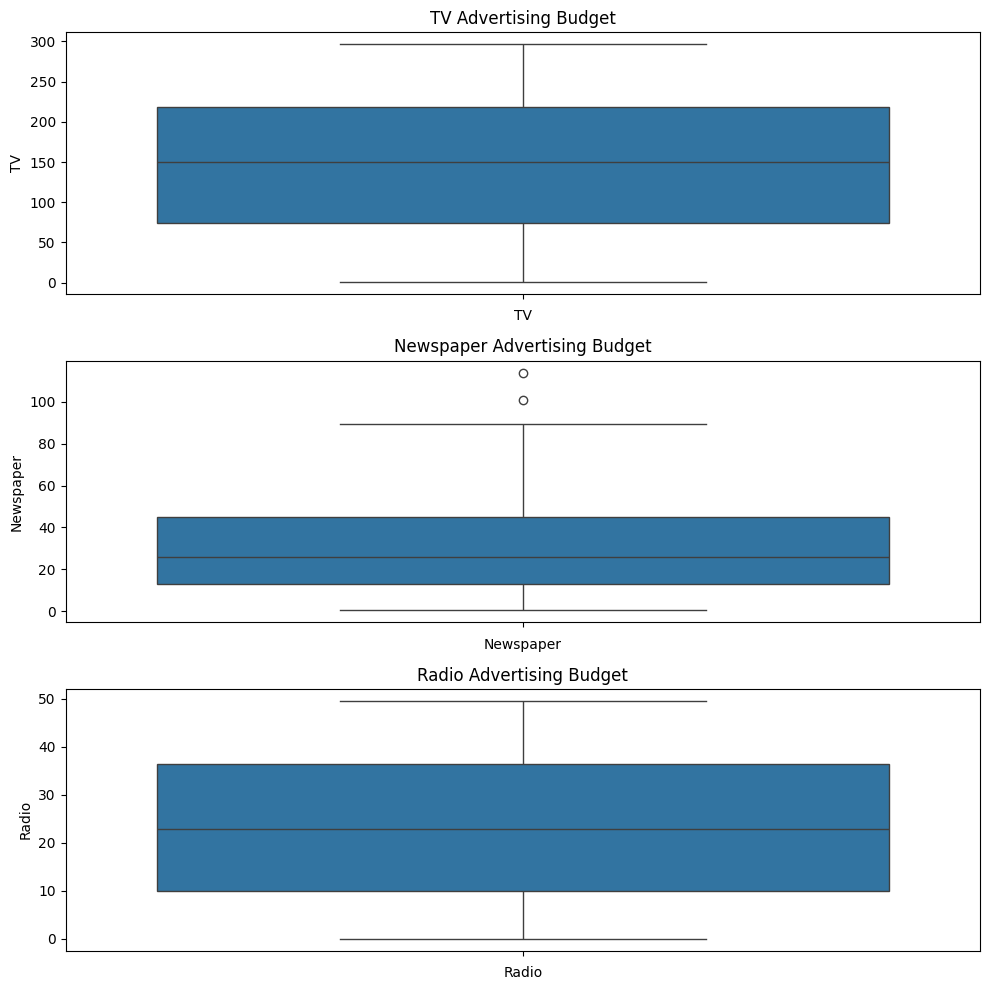

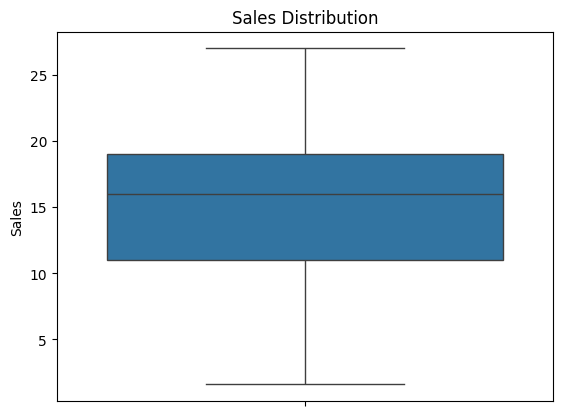

In [ ]:
fig, axs = plt.subplots(3, figsize=(10, 10))
plt1 = sns.boxplot(df['TV'], ax=axs[0])
plt1.set_title('TV Advertising Budget')
plt1.set_xlabel('TV')
plt2 = sns.boxplot(df['Newspaper'], ax=axs[1])
plt2.set_title('Newspaper Advertising Budget')
plt2.set_xlabel('Newspaper')
plt3 = sns.boxplot(df['Radio'], ax=axs[2])
plt3.set_title('Radio Advertising Budget')
plt3.set_xlabel('Radio')
plt.tight_layout()
plt.show()

sns.boxplot(df['Sales'])
plt.title('Sales Distribution')
plt.show()



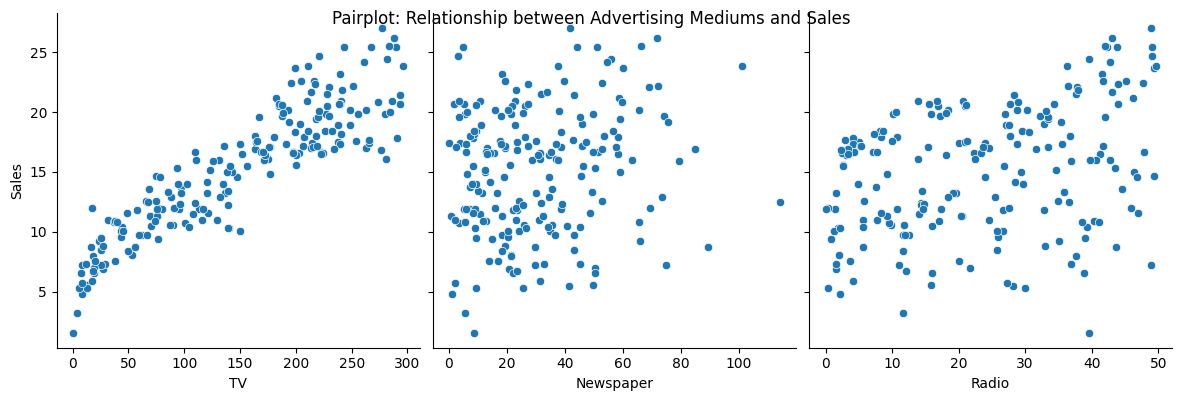

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle('Pairplot: Relationship between Advertising Mediums and Sales')
plt.show()

In [ ]:
X = df['TV']
y = df['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


X_train.head(10)

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
127     80.2
81     239.8
88      88.3
119     19.4
110    225.8
Name: TV, dtype: float64

In [ ]:
y_train.head(10)

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
127    11.9
81     17.3
88     12.9
119     6.6
110    18.4
Name: Sales, dtype: float64

<ipython-input-18-58a6e5657d2a>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15, ax=ax2)


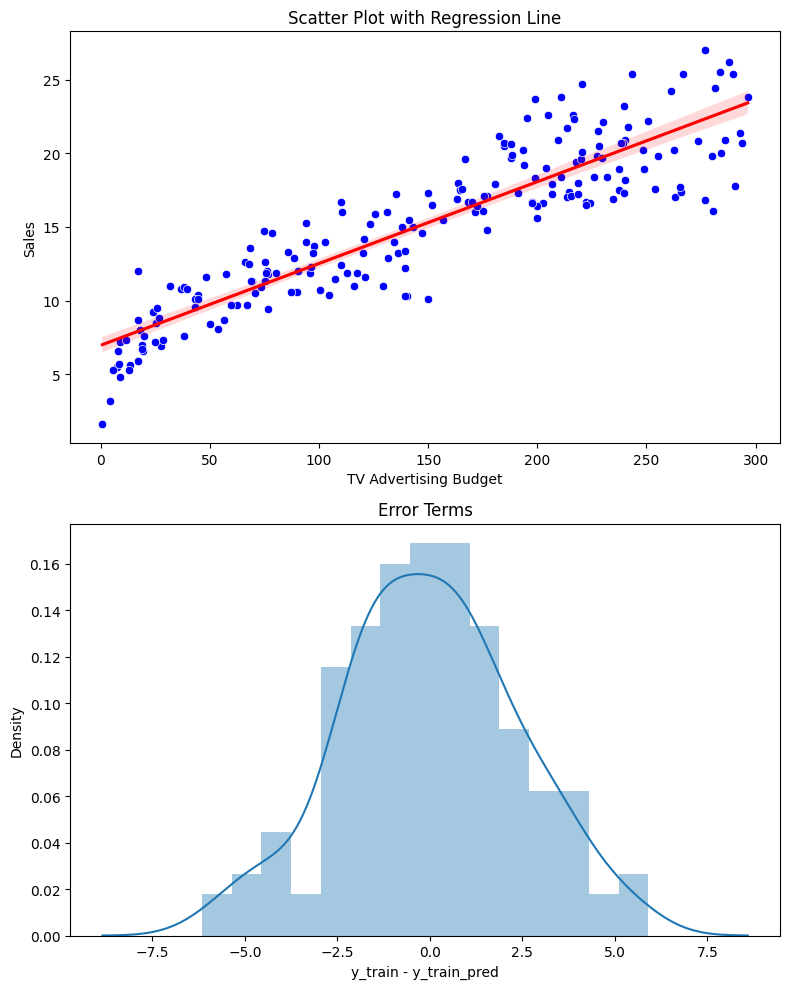

In [ ]:
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Predicted values
y_train_pred = lr.predict(X_train_sm)

# Residuals
res = (y_train - y_train_pred)

# Create a subplot with two vertically stacked plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Scatter plot with regression line
sns.scatterplot(x='TV', y='Sales', data=df, color='blue', ax=ax1)
sns.regplot(x='TV', y='Sales', data=df, scatter=False, color='red', line_kws={'color': 'red'}, ax=ax1)

ax1.set_xlabel('TV Advertising Budget')
ax1.set_ylabel('Sales')
ax1.set_title('Scatter Plot with Regression Line')

# Residual plot
sns.distplot(res, bins=15, ax=ax2)
ax2.set_title('Error Terms')
ax2.set_xlabel('y_train - y_train_pred')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


In [ ]:
# Metrics on training set
print("Metrics on Training Set:")
print("RMSE on Training Set:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared on Training Set:", r2_score(y_train, y_train_pred))

Metrics on Training Set:
RMSE on Training Set: 2.3984162246129914
R-squared on Training Set: 0.8157933136480389


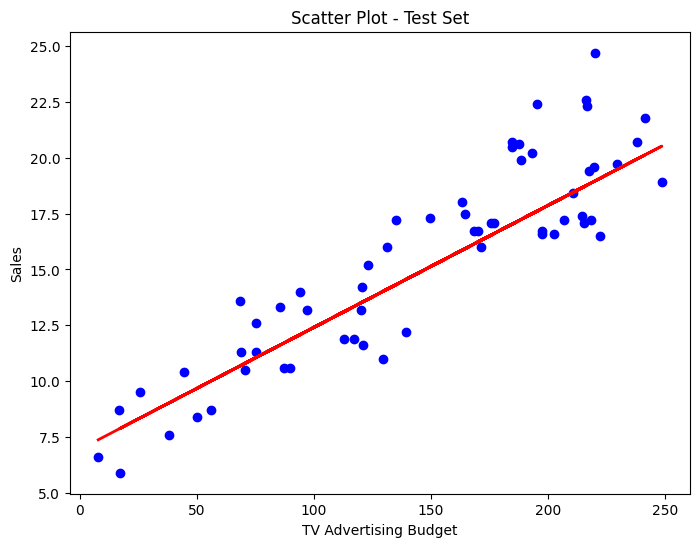

RMSE on Test Set: 2.019296008966232
R-squared on Test Set: 0.792103160124566


In [ ]:
X_test_sm = sm.add_constant(X_test)

# Predicted values on the test set
y_test_pred = lr.predict(X_test_sm)

# Residuals on the test set
res_test = (y_test - y_test_pred)

# Calculate metrics for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r_squared_test = r2_score(y_test, y_test_pred)

# Create a scatter plot for the test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_test_pred, color='red', linewidth=2)

plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Scatter Plot - Test Set')
plt.show()

# Print metrics for the test set
print("RMSE on Test Set:", rmse_test)
print("R-squared on Test Set:", r_squared_test)

In [26]:
# Print metrics for the test set
print("\nMetrics on Test Set:")
print("RMSE on Test Set:", rmse_test)
print("R-squared on Test Set:", r_squared_test)


Metrics on Test Set:
RMSE on Test Set: 2.019296008966232
R-squared on Test Set: 0.792103160124566
